<a href="https://colab.research.google.com/github/veshitala/Deep_learning_experiments/blob/master/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/veshitala/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2798 (delta 1), reused 0 (delta 0), pack-reused 2792
Receiving objects: 100% (2798/2798), 35.98 MiB | 46.28 MiB/s, done.
Resolving deltas: 100% (1801/1801), done.


In [2]:
ls

darkflow/  sample_data/


In [3]:
cd ./darkflow/

/content/darkflow


In [4]:
! python3 setup.py build_ext --inplace


Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [5]:
! pip install -e .


Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [6]:
! pip install .


Processing /content/darkflow
  Stored in directory: /tmp/pip-ephem-wheel-cache-avp38177/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2


W0701 10:44:34.418087 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0701 10:44:34.419401 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0701 10:44:34.420319 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0701 10:44:34.422616 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0701 10:44:34.423860 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/buil

In [8]:
## Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
ls

build/  darkflow/           flow*       preview.png  setup.py
cfg/    darkflow.egg-info/  labels.txt  README.md    test/
ckpt/   demo.gif            LICENSE     sample_img/  YOLO.ipynb


In [0]:
options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-voc.weights",
           "batch": 4,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/yolo_dataset/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/yolo_dataset/images/"}

In [13]:
tfnet = TFNet(options)


Parsing ./cfg/yolov2-voc.cfg
Parsing ./cfg/yolov2-voc-1c.cfg
Loading /content/gdrive/My Drive/YOLO/yolov2-voc.weights ...


W0701 10:48:24.593351 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:105: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 10:48:24.601181 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:70: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0701 10:48:24.602933 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:71: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0701 10:48:24.616317 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/baseop.py:84: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0701 10:48:24.681667 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/ops/simple.py:106: The name tf.nn.max_pool is de

Successfully identified 202704264 bytes
Finished in 0.7424604892730713s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 52, 52, 128

W0701 10:48:29.739494 140559948224384 deprecation.py:506] From /content/darkflow/darkflow/net/ops/convolution.py:28: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 1024)
 Load  |  Yep!  | concat [16]                      | (?, 26, 26, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 26, 26, 64)
 Load  |  Yep!  | local flatten 2x2                | (?, 13, 13, 256)
 Load  |  Yep!  | concat [27, 24]                  | (?, 13, 13, 1280)


W0701 10:48:30.280422 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:132: The name tf.GPUOptions is deprecated. Please use tf.compat.v1.GPUOptions instead.



 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 1024)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 13, 13, 30)
-------+--------+----------------------------------+---------------
GPU mode with 1.0 usage
./cfg/yolov2-voc-1c.cfg loss hyper-parameters:
	H       = 13
	W       = 13
	box     = 5
	classes = 1
	scales  = [1.0, 5.0, 1.0, 1.0]


W0701 10:48:30.468066 140559948224384 deprecation.py:323] From /content/darkflow/darkflow/net/yolov2/train.py:87: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0701 10:48:30.497879 140559948224384 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/yolov2/train.py:107: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0701 10:48:30.586506 140559948224384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Building ./cfg/yolov2-voc-1c.cfg loss
Building ./cfg/yolov2-voc-1c.cfg train op


W0701 10:48:32.469557 140559948224384 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Finished in 14.627410888671875s



In [14]:
tfnet.train()




./cfg/yolov2-voc-1c.cfg parsing /content/gdrive/My Drive/YOLO/yolo_dataset/annotations/
Parsing for ['monkey'] 
[====================>]100%  monkey.131.xml
Statistics:
monkey: 2896
Dataset size: 1076
Dataset of 1076 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 8
	Epoch number  : 50
	Backup every  : 2000
step 1 - loss 108.0856704711914 - moving ave loss 108.0856704711914
step 2 - loss 105.51872253417969 - moving ave loss 107.82897567749023
step 3 - loss 104.26209259033203 - moving ave loss 107.47228736877442
step 4 - loss 103.8731918334961 - moving ave loss 107.11237781524659
step 5 - loss 102.49984741210938 - moving ave loss 106.65112477493287
step 6 - loss 101.77719116210938 - moving ave loss 106.16373141365052
step 7 - loss 101.12060546875 - moving ave loss 105.65941881916048
step 8 - loss 100.3026351928711 - moving ave loss 105.12374045653155
step 9 - loss 99.64277648925781 - moving ave loss 104.57564405980419
step 10 - loss 98.77018737792969 - moving a

KeyboardInterrupt: ignored

In [0]:
tfnet.savepb()

In [16]:

options = {"model": "cfg/yolov2-voc-1c.cfg",
           "load": -1,
           "gpu": 1.0,
          "threshold":0.01}
  


"""options = {"model": "cfg/yolov2-voc-1c.cfg",
           "load": 5500,
           "gpu": 1.0,
          "threshold":0.01,
          "pbLoad":"/contrnt/gdrive/My Drive/" ,
          "metaLoad":"/content/gdrive/My Drive/"}"""



'options = {"model": "cfg/yolov2-voc-1c.cfg",\n           "load": 5500,\n           "gpu": 1.0,\n          "threshold":0.01,\n          "pbLoad":"/contrnt/gdrive/My Drive/" ,\n          "metaLoad":"/content/gdrive/My Drive/"}'

In [17]:
tfnet2 = TFNet(options)


Parsing cfg/yolov2-voc-1c.cfg
Loading None ...
Finished in 0.000148773193359375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 52

W0701 09:13:51.305875 140588585490304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Loading from ./ckpt/yolov2-voc-1c-3250
Finished in 6.431390762329102s



In [18]:

tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-1c-3250


In [31]:
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/testimage.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)


[]


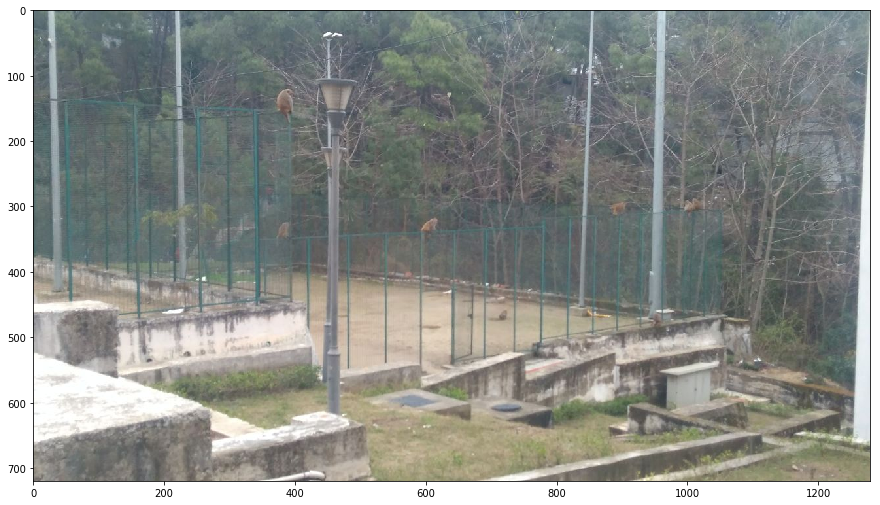

In [28]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.2:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

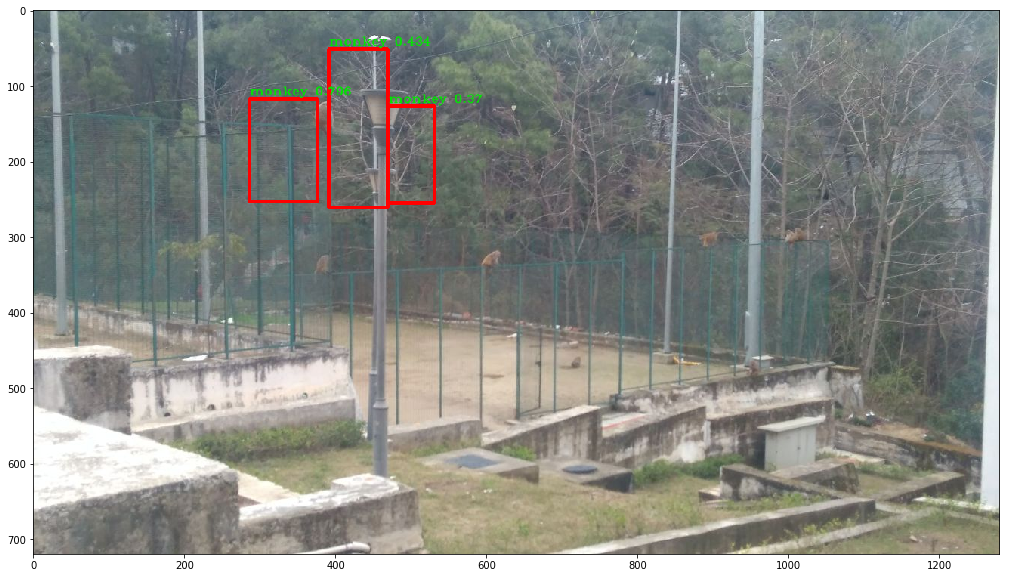

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

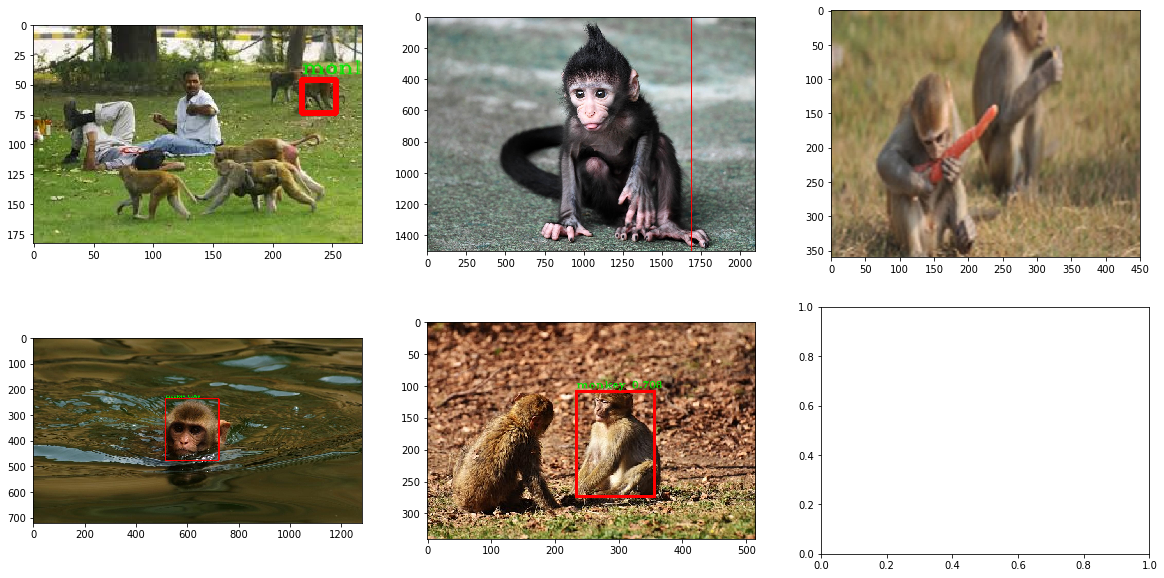

In [38]:
from math import ceil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(5):
    original_img = cv2.imread("/content/gdrive/My Drive/test_image" + str(i+1) + ".jpg")
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    results = tfnet2.return_predict(original_img)
    
    ax[ceil(i/3)-1, i%3].imshow(boxing(original_img, results))


options = {"model": "cfg/tiny-yolo-1c.cfg",
           "load": -1,
           "gpu": 1.0,
          "threshold": 0.5}
          
          **Working**

options = {"model": "./cfg/yolov2-tiny-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-tiny.weights",
           "batch": 64,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/images/"}
           
           **working**

options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-voc.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/images/"}
           
# working

In [0]:
#Inference on video

cap = cv2.VideoCapture('/content/gdrive/My Drive/monkey_test.avi')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/content/gdrive/My Drive/output_test.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        #cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()    